<a href="https://colab.research.google.com/github/Serhii-Kravchenko-2022/Home_work_Data_Science8/blob/main/Hw10_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam

In [22]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
# змінюєм розмір картинок для VGG16
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)

# Нормалізуємо значення з (0, 255) to (0, 1)
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [27]:
X_train.shape

(60000, 32, 32, 3)

In [28]:
X_test.shape

(10000, 32, 32, 3)

In [29]:
# Перетворюємо мітки по категоріям
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [30]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16_base.trainable = False

In [31]:
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [32]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=6,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/6
235/235 [==============================] - 851s 4s/step - loss: 0.6886 - accuracy: 0.7767 - val_loss: 0.5091 - val_accuracy: 0.8209
Epoch 2/6
235/235 [==============================] - 870s 4s/step - loss: 0.4639 - accuracy: 0.8330 - val_loss: 0.4517 - val_accuracy: 0.8387
Epoch 3/6
235/235 [==============================] - 869s 4s/step - loss: 0.4222 - accuracy: 0.8465 - val_loss: 0.4319 - val_accuracy: 0.8438
Epoch 4/6
235/235 [==============================] - 849s 4s/step - loss: 0.3967 - accuracy: 0.8562 - val_loss: 0.4101 - val_accuracy: 0.8513
Epoch 5/6
235/235 [==============================] - 867s 4s/step - loss: 0.3810 - accuracy: 0.8620 - val_loss: 0.4028 - val_accuracy: 0.8539
Epoch 6/6
235/235 [==============================] - 869s 4s/step - loss: 0.3665 - accuracy: 0.8665 - val_loss: 0.3931 - val_accuracy: 0.8580


In [ ]:
results = model.evaluate(X_test, y_test)
results

313/313 [==============================] - 126s 401ms/step - loss: 0.3931 - accuracy: 0.8580


[0.3930891156196594, 0.8579999804496765]

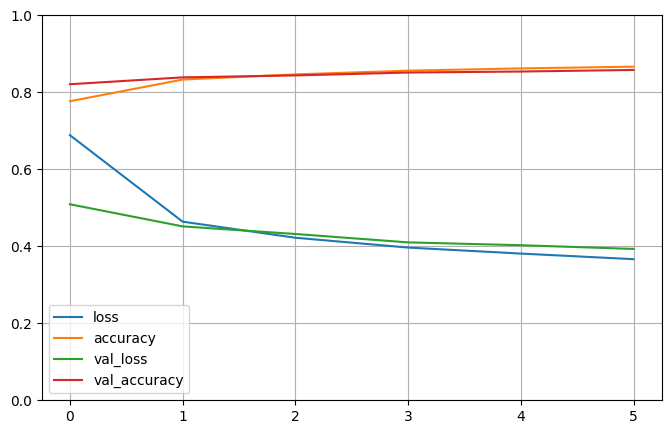

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [34]:
#донавчання
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


vgg16_base.trainable = True
set_trainable = False
for layer in vgg16_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


addtrain_model = Sequential([
   vgg16_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [35]:
addtrain_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [36]:
addtrain_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [38]:
history = addtrain_model.fit(
    X_train,
    y_train,
    epochs=2,
    batch_size=256,
    validation_data=(X_test, y_test)
)

Epoch 1/2
235/235 [==============================] - 3236s 14s/step - loss: 0.4088 - accuracy: 0.8535 - val_loss: 0.3293 - val_accuracy: 0.8837
Epoch 2/2
235/235 [==============================] - 3234s 14s/step - loss: 0.2841 - accuracy: 0.8948 - val_loss: 0.3004 - val_accuracy: 0.8886


In [39]:
results = addtrain_model.evaluate(X_test, y_test)
results

313/313 [==============================] - 127s 406ms/step - loss: 0.3004 - accuracy: 0.8886


[0.3004123270511627, 0.8885999917984009]

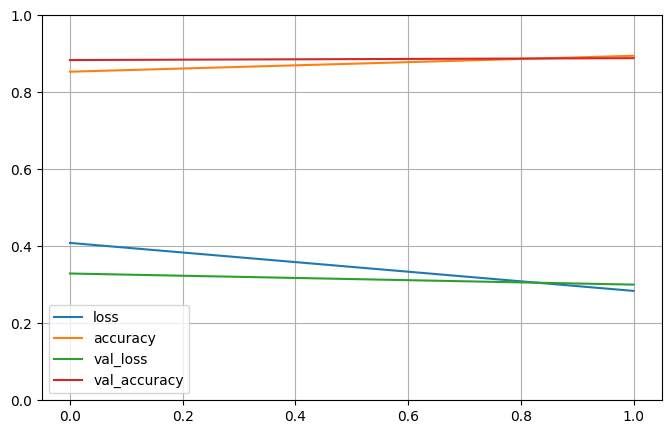

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Висновок: порівнюючи звичайну згорткову мережу та згорткову мережу, що використовує VGG16 в якості згорткової основи, можемо помітити, що звичайна мережа показала вищу точність. VGG16 з донавчанням трьох останніх шарів в 2 єпохи, підвищила точність з 0,857 до 0,888, але не показала вищої точності порівняно з звичайною нейронною мережею з модуля 9 - 0,888 проти 0,890. Можливо перебирвючи параметри згорткової мережі можливо підвищити точність, але час навчання та ресурси, в умовах виконання домашнього завдання, заважають це зробити.